In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**DATA PREPROCESSING**

In [ ]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


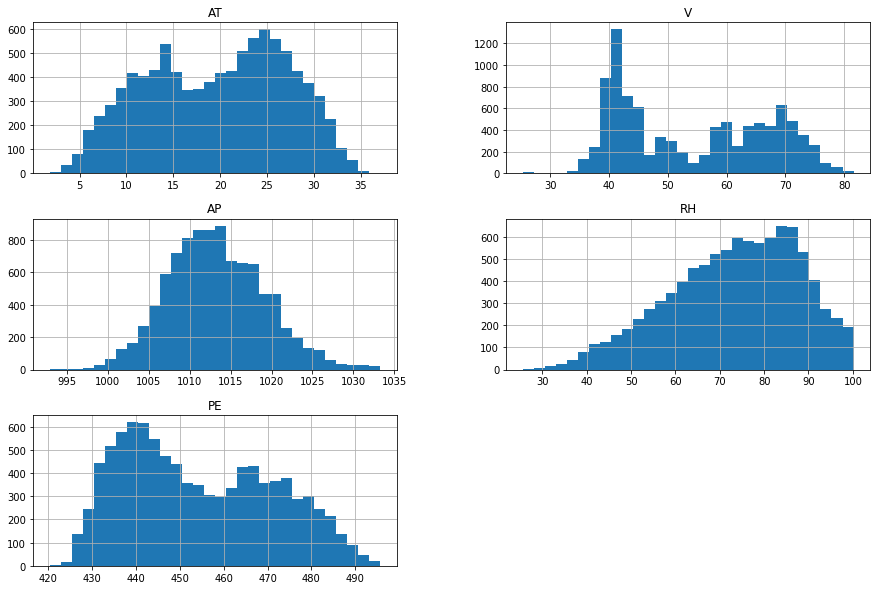

In [ ]:
df.hist(bins=30, figsize=(15,10),layout=(3,2));

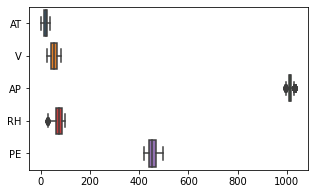

In [ ]:
#box plot
plt.figure(figsize=(5,3))
sns.boxplot(data=df,orient='h')

In [ ]:
#relational matrix/relation
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


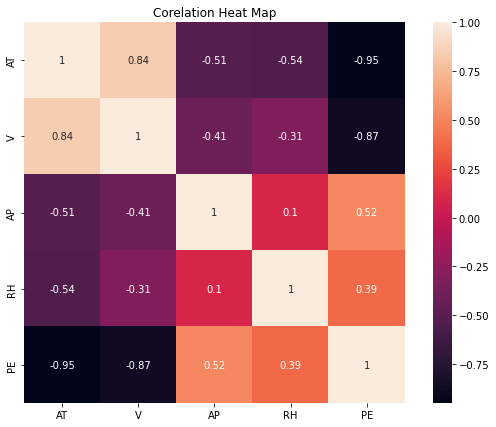

In [ ]:

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True)
plt.title("Corelation Heat Map")
plt.show()


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X


array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [ ]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size= 0.25, random_state=1 )

Buliding ANN

In [ ]:
#initilizing ann
ann = tf.keras.models.Sequential()

In [ ]:
#1st Layer (adding inputlayer and hiddenlayer)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))  

In [ ]:
#2nd Layer ( hiddenlayer)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

COMPILING AND TRAINING 

In [ ]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
ann.fit(X_train,y_train, epochs = 150)

Epoch 1/150
225/225 [==============================] - 1s 1ms/step - loss: 65442.3242
Epoch 2/150
225/225 [==============================] - 0s 1ms/step - loss: 2419.1326
Epoch 3/150
225/225 [==============================] - 0s 1ms/step - loss: 408.2186
Epoch 4/150
225/225 [==============================] - 0s 1ms/step - loss: 398.1725
Epoch 5/150
225/225 [==============================] - 0s 1ms/step - loss: 392.9536
Epoch 6/150
225/225 [==============================] - 0s 1ms/step - loss: 386.4457
Epoch 7/150
225/225 [==============================] - 0s 1ms/step - loss: 379.4120
Epoch 8/150
225/225 [==============================] - 0s 1ms/step - loss: 371.3264
Epoch 9/150
225/225 [==============================] - 0s 1ms/step - loss: 362.3121
Epoch 10/150
225/225 [==============================] - 0s 1ms/step - loss: 352.5439
Epoch 11/150
225/225 [==============================] - 0s 1ms/step - loss: 341.8299
Epoch 12/150
225/225 [==============================] - 0s 1ms/step - l

Predection on Testset

In [ ]:
y_pred=ann.predict(X_test)
np.set_printoptions(precision=2)

In [ ]:
df1=pd.DataFrame()

In [ ]:
df1["Predction"] = pd.Series(list(y_pred))
df1["Original_value"] = pd.Series(list(y_test))

In [ ]:
df1

,Predction,Original_value
0,[453.83948],458.96
1,[460.68417],463.29
2,[438.78293],435.27
3,[482.3453],484.31
4,[470.06073],473.55
...,...,...
2387,[434.6411],435.56
2388,[443.93753],443.91
2389,[457.43332],464.44
2390,[428.48065],426.93


In [ ]:
print(ann.predict([[14.67,54.23,1002.65,91.34]]))

[[455.79]]
